In [1]:
#installing nltk
!pip install nltk

In [2]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', 100)

In [4]:
# Read in the data from the data folder
df = pd.read_csv("C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1005 AI Decision Making/Project-3/IMDB_dataset.csv")
df.head()

review  \
0  I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air...   
1  Probably my all-time favorite movie, a story of selflessness, sacrifice and dedication to a nobl...   
2  I sure would like to see a resurrection of a up dated Seahunt series with the tech they have tod...   
3  This show was an amazing, fresh & innovative idea in the 70's when it first aired. The first 7 o...   
4  Encouraged by the positive comments about this film on here I was looking forward to watching th...   

  sentiment  
0  positive  
1  positive  
2  positive  
3  negative  
4  negative

In [5]:
# Swapping columns just to get setiment values at column 1
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df


df = swap_columns(df, 'sentiment', 'review')
df.head()

sentiment  \
0  positive   
1  positive   
2  positive   
3  negative   
4  negative   

                                                                                                review  
0  I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air...  
1  Probably my all-time favorite movie, a story of selflessness, sacrifice and dedication to a nobl...  
2  I sure would like to see a resurrection of a up dated Seahunt series with the tech they have tod...  
3  This show was an amazing, fresh & innovative idea in the 70's when it first aired. The first 7 o...  
4  Encouraged by the positive comments about this film on here I was looking forward to watching th...

### Remove punctuation

In [6]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [7]:
def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

df['review_nopunct'] = df['review'].apply(lambda x: remove_punct(x))

df.head()

sentiment  \
0  positive   
1  positive   
2  positive   
3  negative   
4  negative   

                                                                                                review  \
0  I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air...   
1  Probably my all-time favorite movie, a story of selflessness, sacrifice and dedication to a nobl...   
2  I sure would like to see a resurrection of a up dated Seahunt series with the tech they have tod...   
3  This show was an amazing, fresh & innovative idea in the 70's when it first aired. The first 7 o...   
4  Encouraged by the positive comments about this film on here I was looking forward to watching th...   

                                                                                        review_nopunct  
0  I thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air ...  
1  Probably my alltime favorite movie a story of selflessness sacrifice and dedication to a noble c...  
2  I sure would like to see a resurrection of a up dated Seahunt series with the tech they have tod...  
3  This show was an amazing fresh  innovative idea in the 70s when it first aired The first 7 or 8 ...  
4  Encouraged by the positive comments about this film on here I was looking forward to watching th...

* We can see that all the punctuations are removed from the data

### Tokenization

In [8]:
import re

def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

df['review_tokenized'] = df['review_nopunct'].apply(lambda x: tokenize(x.lower()))

df.head()

sentiment  \
0  positive   
1  positive   
2  positive   
3  negative   
4  negative   

                                                                                                review  \
0  I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air...   
1  Probably my all-time favorite movie, a story of selflessness, sacrifice and dedication to a nobl...   
2  I sure would like to see a resurrection of a up dated Seahunt series with the tech they have tod...   
3  This show was an amazing, fresh & innovative idea in the 70's when it first aired. The first 7 o...   
4  Encouraged by the positive comments about this film on here I was looking forward to watching th...   

                                                                                        review_nopunct  \
0  I thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air ...   
1  Probably my alltime favorite movie a story of selflessness sacrifice and dedication to a noble c...   
2  I sure would like to see a resurrection of a up dated Seahunt series with the tech they have tod...   
3  This show was an amazing fresh  innovative idea in the 70s when it first aired The first 7 or 8 ...   
4  Encouraged by the positive comments about this film on here I was looking forward to watching th...   

                                                                                      review_tokenized  
0  [i, thought, this, was, a, wonderful, way, to, spend, time, on, a, too, hot, summer, weekend, si...  
1  [probably, my, alltime, favorite, movie, a, story, of, selflessness, sacrifice, and, dedication,...  
2  [i, sure, would, like, to, see, a, resurrection, of, a, up, dated, seahunt, series, with, the, t...  
3  [this, show, was, an, amazing, fresh, innovative, idea, in, the, 70s, when, it, first, aired, th...  
4  [encouraged, by, the, positive, comments, about, this, film, on, here, i, was, looking, forward,...

* We can see that words in our data are converted into tokens

### Remove Stopwords

In [9]:
import nltk

stopword = nltk.corpus.stopwords.words('english')

In [10]:
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopword]
    return text

df['review_nostop'] = df['review_tokenized'].apply(lambda x: remove_stopwords(x))

df.head()

sentiment  \
0  positive   
1  positive   
2  positive   
3  negative   
4  negative   

                                                                                                review  \
0  I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air...   
1  Probably my all-time favorite movie, a story of selflessness, sacrifice and dedication to a nobl...   
2  I sure would like to see a resurrection of a up dated Seahunt series with the tech they have tod...   
3  This show was an amazing, fresh & innovative idea in the 70's when it first aired. The first 7 o...   
4  Encouraged by the positive comments about this film on here I was looking forward to watching th...   

                                                                                        review_nopunct  \
0  I thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air ...   
1  Probably my alltime favorite movie a story of selflessness sacrifice and dedication to a noble c...   
2  I sure would like to see a resurrection of a up dated Seahunt series with the tech they have tod...   
3  This show was an amazing fresh  innovative idea in the 70s when it first aired The first 7 or 8 ...   
4  Encouraged by the positive comments about this film on here I was looking forward to watching th...   

                                                                                      review_tokenized  \
0  [i, thought, this, was, a, wonderful, way, to, spend, time, on, a, too, hot, summer, weekend, si...   
1  [probably, my, alltime, favorite, movie, a, story, of, selflessness, sacrifice, and, dedication,...   
2  [i, sure, would, like, to, see, a, resurrection, of, a, up, dated, seahunt, series, with, the, t...   
3  [this, show, was, an, amazing, fresh, innovative, idea, in, the, 70s, when, it, first, aired, th...   
4  [encouraged, by, the, positive, comments, about, this, film, on, here, i, was, looking, forward,...   

                                                                                         review_nostop  
0  [thought, wonderful, way, spend, time, hot, summer, weekend, sitting, air, conditioned, theater,...  
1  [probably, alltime, favorite, movie, story, selflessness, sacrifice, dedication, noble, cause, p...  
2  [sure, would, like, see, resurrection, dated, seahunt, series, tech, today, would, bring, back, ...  
3  [show, amazing, fresh, innovative, idea, 70s, first, aired, first, 7, 8, years, brilliant, thing...  
4  [encouraged, positive, comments, film, looking, forward, watching, film, bad, mistake, ive, seen...

* We can see that all the stopwords are removed from our data

### Lemmatization

In [11]:
import nltk
wn = nltk.WordNetLemmatizer()

In [12]:
def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

df['review_lemmatized'] = df['review_nostop'].apply(lambda x: lemmatizing(x))

df.head(10)

sentiment  \
0  positive   
1  positive   
2  positive   
3  negative   
4  negative   
5  negative   
6  negative   
7  negative   
8  positive   
9  negative   

                                                                                                review  \
0  I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air...   
1  Probably my all-time favorite movie, a story of selflessness, sacrifice and dedication to a nobl...   
2  I sure would like to see a resurrection of a up dated Seahunt series with the tech they have tod...   
3  This show was an amazing, fresh & innovative idea in the 70's when it first aired. The first 7 o...   
4  Encouraged by the positive comments about this film on here I was looking forward to watching th...   
5  Phil the Alien is one of those quirky films where the humour is based around the oddness of ever...   
6  I saw this movie when I was about 12 when it came out. I recall the scariest scene was the big b...   
7  So im not a big fan of Boll's work but then again not many are. I enjoyed his movie Postal (mayb...   
8  This a fantastic movie of three prisoners who become famous. One of the actors is george clooney...   
9  This movie made it into one of my top 10 most awful movies. Horrible. <br /><br />There wasn't a...   

                                                                                        review_nopunct  \
0  I thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air ...   
1  Probably my alltime favorite movie a story of selflessness sacrifice and dedication to a noble c...   
2  I sure would like to see a resurrection of a up dated Seahunt series with the tech they have tod...   
3  This show was an amazing fresh  innovative idea in the 70s when it first aired The first 7 or 8 ...   
4  Encouraged by the positive comments about this film on here I was looking forward to watching th...   
5  Phil the Alien is one of those quirky films where the humour is based around the oddness of ever...   
6  I saw this movie when I was about 12 when it came out I recall the scariest scene was the big bi...   
7  So im not a big fan of Bolls work but then again not many are I enjoyed his movie Postal maybe i...   
8  This a fantastic movie of three prisoners who become famous One of the actors is george clooney ...   
9  This movie made it into one of my top 10 most awful movies Horrible br br There wasnt a continuo...   

                                                                                      review_tokenized  \
0  [i, thought, this, was, a, wonderful, way, to, spend, time, on, a, too, hot, summer, weekend, si...   
1  [probably, my, alltime, favorite, movie, a, story, of, selflessness, sacrifice, and, dedication,...   
2  [i, sure, would, like, to, see, a, resurrection, of, a, up, dated, seahunt, series, with, the, t...   
3  [this, show, was, an, amazing, fresh, innovative, idea, in, the, 70s, when, it, first, aired, th...   
4  [encouraged, by, the, positive, comments, about, this, film, on, here, i, was, looking, forward,...   
5  [phil, the, alien, is, one, of, those, quirky, films, where, the, humour, is, based, around, the...   
6  [i, saw, this, movie, when, i, was, about, 12, when, it, came, out, i, recall, the, scariest, sc...   
7  [so, im, not, a, big, fan, of, bolls, work, but, then, again, not, many, are, i, enjoyed, his, m...   
8  [this, a, fantastic, movie, of, three, prisoners, who, become, famous, one, of, the, actors, is,...   
9  [this, movie, made, it, into, one, of, my, top, 10, most, awful, movies, horrible, br, br, there...   

                                                                                         review_nostop  \
0  [thought, wonderful, way, spend, time, hot, summer, weekend, sitting, air, conditioned, theater,...   
1  [probably, alltime, favorite, movie, story, selflessness, sacrifice, dedication, noble, cause, p...   
2  [sure, would, 

### TFIDF Vectorization 

In [13]:
# Reading in text again 
import pandas as pd
import re
import string
import nltk
pd.set_option('display.max_colwidth', 100)

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv("C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1005 AI Decision Making/Project-3/IMDB_dataset.csv")
data.head()

review  \
0  I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air...   
1  Probably my all-time favorite movie, a story of selflessness, sacrifice and dedication to a nobl...   
2  I sure would like to see a resurrection of a up dated Seahunt series with the tech they have tod...   
3  This show was an amazing, fresh & innovative idea in the 70's when it first aired. The first 7 o...   
4  Encouraged by the positive comments about this film on here I was looking forward to watching th...   

  sentiment  
0  positive  
1  positive  
2  positive  
3  negative  
4  negative

In [14]:
# Swapping columns just to get setiment values at column 1
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df


data = swap_columns(data, 'sentiment', 'review')
data.head()

sentiment  \
0  positive   
1  positive   
2  positive   
3  negative   
4  negative   

                                                                                                review  
0  I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air...  
1  Probably my all-time favorite movie, a story of selflessness, sacrifice and dedication to a nobl...  
2  I sure would like to see a resurrection of a up dated Seahunt series with the tech they have tod...  
3  This show was an amazing, fresh & innovative idea in the 70's when it first aired. The first 7 o...  
4  Encouraged by the positive comments about this film on here I was looking forward to watching th...

In [15]:
# Create function to remove punctuation, tokenize, remove stopwords, and stem
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

#### Applying TFIDF on 25000 rows

In [16]:
# Apply TFIDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['review'])
print(X_tfidf.shape)
print(tfidf_vect.get_feature_names())

(25000, 93696)
['', '0', '00', '000', '0000000000001', '00000110', '0001', '00015', '001', '0010', '002', '00383042', '0069', '007', '0079', '007br', '0080', '0083', '009', '00schneider', '01', '010', '010707', '010br', '0110', '0126', '0130', '013007', '02', '0210', '03', '03092005', '03oct2009', '04', '04082007', '041', '048', '05', '050', '0510', '053105', '05br', '06', '060241', '0615', '06and', '07', '08', '081006', '089', '08th', '09', '091505', '09br', '0br', '0clock', '0f', '0r', '0s', '0when', '1', '10', '100', '1000', '10000', '100000', '1000000', '10000000', '10000000000', '1000000000000', '100001', '10002000', '10005000', '1000th', '1000word', '1000wordstori', '100100', '100200', '1004', '100b', '100br', '100ft', '100hell', '100ib', '100k', '100millionplu', '100minut', '100minutelong', '100mph', '100th', '100thgrade', '100time', '100x', '100yard', '100year', '100yearold', '101', '1010', '1010br', '1010i', '1011', '1012', '1013', '1014', '1015', '101br', '101minut', '101st',

C:\Users\Surya\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [17]:
X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns = tfidf_vect.get_feature_names()
X_tfidf_df

0   00  000  0000000000001  00000110  0001  00015  001  0010  \
0      0.0  0.0  0.0  0.0            0.0       0.0   0.0    0.0  0.0   0.0   
1      0.0  0.0  0.0  0.0            0.0       0.0   0.0    0.0  0.0   0.0   
2      0.0  0.0  0.0  0.0            0.0       0.0   0.0    0.0  0.0   0.0   
3      0.0  0.0  0.0  0.0            0.0       0.0   0.0    0.0  0.0   0.0   
4      0.0  0.0  0.0  0.0            0.0       0.0   0.0    0.0  0.0   0.0   
...    ...  ...  ...  ...            ...       ...   ...    ...  ...   ...   
24995  0.0  0.0  0.0  0.0            0.0       0.0   0.0    0.0  0.0   0.0   
24996  0.0  0.0  0.0  0.0            0.0       0.0   0.0    0.0  0.0   0.0   
24997  0.0  0.0  0.0  0.0            0.0       0.0   0.0    0.0  0.0   0.0   
24998  0.0  0.0  0.0  0.0            0.0       0.0   0.0    0.0  0.0   0.0   
24999  0.0  0.0  0.0  0.0            0.0       0.0   0.0    0.0  0.0   0.0   

       ...  überbab  überspi  übertrash  überwoman  ünel  üvegtigri  \
0      ...      0.0      0.0        0.0        0.0   0.0        0.0   
1      ...      0.0      0.0        0.0        0.0   0.0        0.0   
2      ...      0.0      0.0        0.0        0.0   0.0        0.0   
3      ...      0.0      0.0        0.0        0.0   0.0        0.0   
4      ...      0.0      0.0        0.0        0.0   0.0        0.0   
...    ...      ...      ...        ...        ...   ...        ...   
24995  ...      0.0      0.0        0.0        0.0   0.0        0.0   
24996  ...      0.0      0.0        0.0        0.0   0.0        0.0   
24997  ...      0.0      0.0        0.0        0.0   0.0        0.0   
24998  ...      0.0      0.0        0.0        0.0   0.0        0.0   
24999  ...      0.0      0.0        0.0        0.0   0.0        0.0   

       þorleifsson  þór  יגאל  כרמון  
0              0.0  0.0   0.0    0.0  
1              0.0  0.0   0.0    0.0  
2              0.0  0.0   0.0    0.0  
3              0.0  0.0   0.0    0.0  
4              0.0  0.0   0.0    0.0  
...            ...  ...   ...    ...  
24995          0.0  0.0   0.0    0.0  
24996          0.0  0.0   0.0    0.0  
24997          0.0  0.0   0.0    0.0  
24998          0.0  0.0   0.0    0.0  
24999          0.0  0.0   0.0    0.0  

[25000 rows x 93696 columns]

### Exploring parameter settings using GridSearchCV on Random Forest

In [3]:
df = pd.read_csv("C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1005 AI Decision Making/Project-3/IMDB_dataset.csv")
df.head()

review  \
0  I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air...   
1  Probably my all-time favorite movie, a story of selflessness, sacrifice and dedication to a nobl...   
2  I sure would like to see a resurrection of a up dated Seahunt series with the tech they have tod...   
3  This show was an amazing, fresh & innovative idea in the 70's when it first aired. The first 7 o...   
4  Encouraged by the positive comments about this film on here I was looking forward to watching th...   

  sentiment  
0  positive  
1  positive  
2  positive  
3  negative  
4  negative

In [4]:
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df

#swap points and rebounds columns
IMDB = swap_columns(df, 'sentiment', 'review')
IMDB.head()

sentiment  \
0  positive   
1  positive   
2  positive   
3  negative   
4  negative   

                                                                                                review  
0  I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air...  
1  Probably my all-time favorite movie, a story of selflessness, sacrifice and dedication to a nobl...  
2  I sure would like to see a resurrection of a up dated Seahunt series with the tech they have tod...  
3  This show was an amazing, fresh & innovative idea in the 70's when it first aired. The first 7 o...  
4  Encouraged by the positive comments about this film on here I was looking forward to watching th...

# I have tried using classifiers on whole dataset (25000 rows) but I was facing the memory error
# Then I tried it on 6000 rows but still was showing memory error
# Now the following steps are performed on a reduced dataset that is 3000 rows
## I have made sure that data is equally distributed with almost equal number of Positive and Negative reviews 

In [5]:
# Reducing dataset
IMDB_reduced = IMDB[0:3000]
IMDB_reduced.head()

sentiment  \
0  positive   
1  positive   
2  positive   
3  negative   
4  negative   

                                                                                                review  
0  I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air...  
1  Probably my all-time favorite movie, a story of selflessness, sacrifice and dedication to a nobl...  
2  I sure would like to see a resurrection of a up dated Seahunt series with the tech they have tod...  
3  This show was an amazing, fresh & innovative idea in the 70's when it first aired. The first 7 o...  
4  Encouraged by the positive comments about this film on here I was looking forward to watching th...

In [6]:
IMDB_reduced.shape

(3000, 2)

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

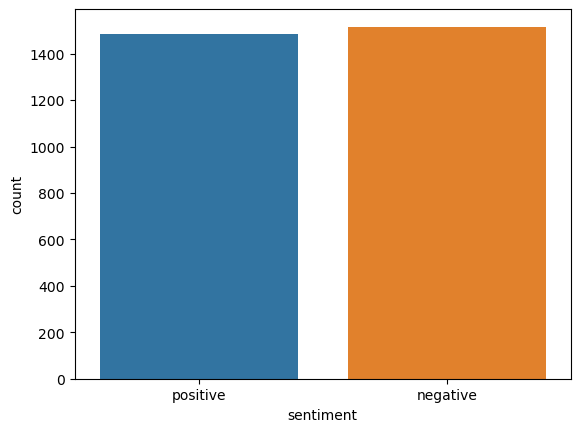

In [8]:
# Check the class distribution
sns.countplot(x='sentiment', data=IMDB_reduced)
plt.show()

In [10]:
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import string

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()


def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

IMDB_reduced['body_len'] = IMDB_reduced['review'].apply(lambda x: len(x) - x.count(" "))
IMDB_reduced['punct%'] = IMDB_reduced['review'].apply(lambda x: count_punct(x))

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

# TF-IDF
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
IMDB_tfidf = tfidf_vect.fit_transform(IMDB_reduced['review'])
IMDB_tfidf_feat = pd.concat([IMDB_reduced['body_len'], IMDB_reduced['punct%'], pd.DataFrame(IMDB_tfidf.toarray())], axis=1)

C:\Users\Surya\AppData\Local\Temp\ipykernel_15400\4183730014.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IMDB_reduced['body_len'] = IMDB_reduced['review'].apply(lambda x: len(x) - x.count(" "))
C:\Users\Surya\AppData\Local\Temp\ipykernel_15400\4183730014.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IMDB_reduced['punct%'] = IMDB_reduced['review'].apply(lambda x: count_punct(x))


In [11]:
IMDB_tfidf_feat.head()

body_len  punct%    0    1    2    3    4    5    6    7  ...  28292  \
0       761     5.3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
1       538     5.2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
2       577     2.1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
3       761     4.3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
4       552     5.6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   

   28293  28294  28295  28296  28297  28298  28299  28300  28301  
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  

[5 rows x 28304 columns]

In [12]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [13]:
rf = RandomForestClassifier()
param = {'n_estimators': [10, 150, 300],
        'max_depth': [30, 60, 90, None]}

gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(IMDB_tfidf_feat, IMDB_reduced['sentiment'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

C:\Users\Surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
8       67.532885      1.758818         1.180504        0.098335   
5       63.112735      0.890666         1.234522        0.201885   
2       46.413775      0.918410         1.403473        0.160273   
11      58.589730      0.844053         0.925861        0.077509   
1       33.411826      5.714540         0.917206        0.067165   

   param_max_depth param_n_estimators  \
8               90                300   
5               60                300   
2               30                300   
11            None                300   
1               30                150   

                                      params  split0_test_score  \
8     {'max_depth': 90, 'n_estimators': 300}           0.838333   
5     {'max_depth': 60, 'n_estimators': 300}           0.838333   
2     {'max_depth': 30, 'n_estimators': 300}           0.828333   
11  {'max_depth': None, 'n_estimators': 300}           0.833333   
1     {'max_depth': 30, 'n_estimators': 150}           0.826667   

    split1_test_score  split2_test_score  split3_test_score  \
8            0.813333           0.838333           0.823333   
5            0.811667           0.853333           0.811667   
2            0.810000           0.846667           0.811667   
11           0.806667           0.840000           0.810000   
1            0.793333           0.848333           0.813333   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
8            0.855000         0.833667        0.014275                1  
5            0.833333         0.829667        0.016104                2  
2            0.846667         0.828667        0.016035                3  
11           0.850000         0.828000        0.016944                4  
1            0.850000         0.826333        0.021458                5

### Exploring parameter settings using GridSearchCV on Gradient Boosting Classifier

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [15]:
gb = GradientBoostingClassifier()
param = {
    'n_estimators': [100, 150], 
    'max_depth': [7, 11, 15],
    'learning_rate': [0.1]
}

clf = GridSearchCV(gb, param, cv=5, n_jobs=-1)
cv_fit = clf.fit(IMDB_tfidf_feat, IMDB_reduced['sentiment'])
pd.DataFrame(cv_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

C:\Users\Surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
1     712.190245    138.774424         0.666080        0.107889   
0     580.135482     10.496833         1.216739        0.135480   
2     499.127150     38.385612         0.653409        0.061288   
3     725.332584      8.989297         0.647219        0.033555   
5     797.466320      6.638410         0.434533        0.055457   

  param_learning_rate param_max_depth param_n_estimators  \
1                 0.1               7                150   
0                 0.1               7                100   
2                 0.1              11                100   
3                 0.1              11                150   
5                 0.1              15                150   

                                                         params  \
1   {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150}   
0   {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}   
2  {'learning_rate': 0.1, 'max_depth': 11, 'n_estimators': 100}   
3  {'learning_rate': 0.1, 'max_depth': 11, 'n_estimators': 150}   
5  {'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 150}   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
1           0.800000           0.768333           0.810000           0.781667   
0           0.788333           0.746667           0.790000           0.788333   
2           0.788333           0.771667           0.780000           0.788333   
3           0.785000           0.756667           0.778333           0.776667   
5           0.773333           0.763333           0.776667           0.785000   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  
1           0.810000         0.794000        0.016486                1  
0           0.806667         0.784000        0.019905                2  
2           0.788333         0.783333        0.006667                3  
3           0.810000         0.781333        0.017172                4  
5           0.795000         0.778667        0.010719                5

### Final evaluation of models

In [16]:
# split into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(IMDB_reduced[['review', 'body_len', 'punct%']], IMDB_reduced['sentiment'], test_size=0.2)

In [17]:
# vectorize text 
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
tfidf_vect_fit = tfidf_vect.fit(X_train['review'])

tfidf_train = tfidf_vect_fit.transform(X_train['review'])
tfidf_test = tfidf_vect_fit.transform(X_test['review'])

X_train_vect = pd.concat([X_train[['body_len', 'punct%']].reset_index(drop=True), 
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['body_len', 'punct%']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()

body_len  punct%    0    1    2    3    4    5    6    7  ...  24972  \
0      1285     4.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
1       542     4.4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
2      1013     7.1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
3       499     7.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
4      1476     4.6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   

   24973  24974  24975  24976  24977  24978  24979  24980  24981  
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  

[5 rows x 24984 columns]

#### Final evaluation of models

In [18]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
import time

In [19]:
#random forest classifier
rf = RandomForestClassifier(n_estimators=300, max_depth=90, n_jobs=-1)

start = time.time()
rf_model = rf.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = rf_model.predict(X_test_vect)
end = time.time()
pred_time = (end - start)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='positive', average='binary')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

C:\Users\Surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Fit time: 8.861 / Predict time: 0.785 ---- Precision: 0.855 / Recall: 0.807 / Accuracy: 0.832


In [20]:
#gradient boosting classifier
gb = GradientBoostingClassifier(n_estimators=150, max_depth=7)

start = time.time()
gb_model = gb.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = gb_model.predict(X_test_vect)
end = time.time()
pred_time = (end - start)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='positive', average='binary')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

C:\Users\Surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Fit time: 278.953 / Predict time: 0.471 ---- Precision: 0.793 / Recall: 0.791 / Accuracy: 0.788


## OBSERVATION 
* For random forest classifier -- Fit time: 8.861 / Predict time: 0.785 ---- Precision: 0.855 / Recall: 0.807 / Accuracy: 0.832
* For gradient boosting classifier --- Fit time: 278.953 / Predict time: 0.471 ---- Precision: 0.793 / Recall: 0.791 / Accuracy: 0.788

* We can see that in our case "random forest classifier" is the best classifier with higher Precision, Recall and Accuracy values